# Задание гипотезы.
## Булыгин Максим, Э-1813

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

Импортируем данные, проверяем их: смотрим описательные статистики.

In [191]:
df = pd.read_excel('UScrime.xlsx')
df.head()

,N,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
0,1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
1,2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
2,3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
3,4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
4,5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


In [3]:
df.describe()

,N,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,24.000000,138.574468,0.340426,105.638298,85.000000,80.234043,561.191489,983.021277,36.617021,101.127660,95.468085,33.978723,525.382979,194.000000,0.047091,26.597921,905.085106
std,13.711309,12.567634,0.478975,11.186999,29.718974,27.961319,40.411814,29.467365,38.071188,102.828819,18.028783,8.445450,96.490944,39.896061,0.022737,7.086895,386.762697
min,1.000000,119.000000,0.000000,87.000000,45.000000,41.000000,480.000000,934.000000,3.000000,2.000000,70.000000,20.000000,288.000000,126.000000,0.006900,12.199600,342.000000
25%,12.500000,130.000000,0.000000,97.500000,62.500000,58.500000,530.500000,964.500000,10.000000,24.000000,80.500000,27.500000,459.500000,165.500000,0.032701,21.600350,658.500000
50%,24.000000,136.000000,0.000000,108.000000,78.000000,73.000000,560.000000,977.000000,25.000000,76.000000,92.000000,34.000000,537.000000,176.000000,0.042100,25.800600,831.000000
75%,35.500000,146.000000,1.000000,114.500000,104.500000,97.000000,593.000000,992.000000,41.500000,132.500000,104.000000,38.500000,591.500000,227.500000,0.054450,30.450750,1057.500000
max,47.000000,177.000000,1.000000,122.000000,166.000000,157.000000,641.000000,1071.000000,168.000000,423.000000,142.000000,58.000000,689.000000,276.000000,0.119804,44.000400,1993.000000


Убеждаемся, что категориальная переменная содержит только два значения.

In [6]:
set(df.So)

{0, 1}

## Задача 1.1.

Смотрим гистрограммы распределения вероятности попасть в тюрьму в южных штатах и вероятности попасть в тюрьму в остальных штатах.

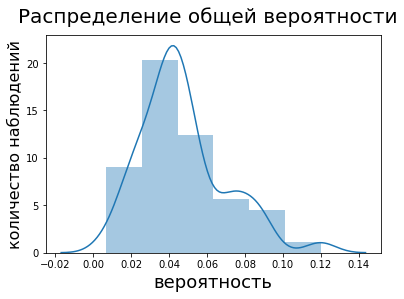

In [244]:
fig = plt.figure()
sns.distplot(df.Prob, bins=6)
fig.suptitle('Распределение общей вероятности', fontsize=20)
plt.xlabel('вероятность', fontsize=18)
plt.ylabel('количество наблюдений', fontsize=16)
plt.show();

<Figure size 432x288 with 0 Axes>

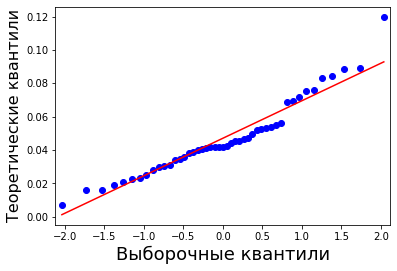

In [253]:
fig = plt.figure()
qqplot(df.Prob, line='s')
plt.xlabel('Выборочные квантили', fontsize=18)
plt.ylabel('Теоретические квантили', fontsize=16)
plt.show();

Графический анализ показывает, что распределения похожи на нормальное (и ядерные оценки плотности и сравнение выборочных и теоретических квантилей из нормального распределения) - но есть выбросы, поэтому, проверим распределения на нормальность.

In [46]:
len(df)

47

Число наблюдений 47, поэтому будем использовать для проверки нормальности распределения критерий Шапиро-Уилка.

In [271]:
print(np.round(sps.shapiro(df.Prob)[1], 4))

0.0179


Так как p-value $< \alpha = 0.05$ для распределения общей вероятности, то отвергаем нулевую гипотезу о нормальности распределения общей вероятности попадания в тюрьму.

Мы имеем ненормальное распределение вероятности попадания в тюрьму, выборки являются независимыми, число выборок - две: южные штаты и остальные штаты.

Выдвинем гипотезу в соответствии с условием задачи: $H_0$ - средняя вероятность оказаться в тюрьме после совершения преступления в южных штатах статистически не отличается от средней вероятности оказаться в тюрьме после совершения преступления от других штатов, $H_1$ - средняя вероятность оказаться в тюрьме после совершения преступления в южных штатах статистически отличается от средней вероятности оказаться в тюрьме после совершения преступления от других штатов.

Распределение не подчиняется нормальному закону, поэтому используем непараметрический критерий. Таким критерием для нашего случая является критерий Манна-Уитни для проверки равенства средних.

In [177]:
from scipy.stats import mannwhitneyu
np.round(mannwhitneyu(df[df.So == 1].Prob, df[df.So == 0].Prob)[1],4)

0.0001

Так как p-value $<\alpha=0.05$, то отвергаем нулевую гипотезу о равенстве средних вероятностей попасть в тюрьму в южных и остальных штатах $\Rightarrow$ шанс попасть в тюрьму зависит от штата.

Вывод: средняя вероятность оказаться в тюрьме после совершения преступления в южных штатах статистически отличается от средней вероятности оказаться в тюрьме после совершения преступления от других штатов. Поэтому, мы можем сказать о том, что это не правда, что что вероятность оказаться в тюрьме после совершения преступления в южных штатах не отличается от вероятности оказаться в тюрьме после совершения преступления от других штатов.

## Задача 1.2.

In [200]:
df_u = pd.concat([df.U1, df.U2])

Графический анализ нормальности распределения уровня дает отрицательный результат - судя по всему, распределение ненормальное.

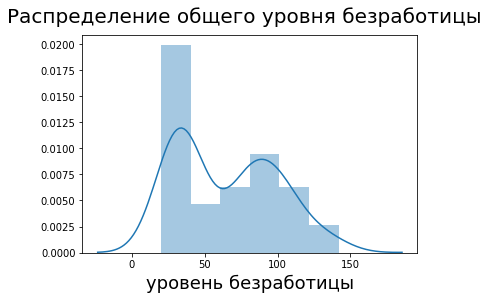

In [264]:
fig = plt.figure()
sns.distplot(df_u, bins=6)
fig.suptitle('Распределение общего уровня безработицы', fontsize=20)
plt.xlabel('уровень безработицы', fontsize=18)
plt.show();

<Figure size 432x288 with 0 Axes>

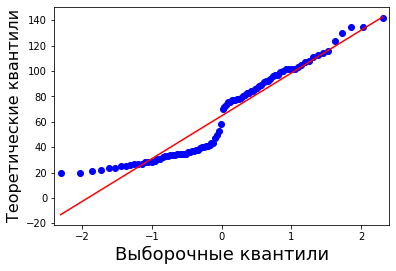

In [265]:
fig = plt.figure()
qqplot(df_u, line='s')
plt.xlabel('Выборочные квантили', fontsize=18)
plt.ylabel('Теоретические квантили', fontsize=16)
plt.show();

Проверим на нормальность критерием Колмогорова (поскольку в конкатенированной таблице с данынми будет 47*2 = 94 наблюдения) распределения уровня безработицы у юношей и мужчин.

In [221]:
np.round(sps.kstest(df_u, cdf=sps.norm.cdf, args=(np.mean(df_u), np.std(df_u)))[1], 4)

0.0011

Так как p-value  $<\alpha=0.05$  для распределения общего уровня безработицы, то отвергаем нулевую гипотезу о нормальности распределения.

Общее распределение ненормально, выборки зависимы, выборок две - поэтому выбираем критерий Вилкоксона для проверки равенства средних уровней безработицы.

In [225]:
from scipy.stats import wilcoxon
np.round(wilcoxon(df.U1,df.U2)[1], 6)

0.0

Так как p-value  $<\alpha=0.05$, то отвергаем нулевую гипотезу о равенстве среднего уровня безработицы у мужчин и юнош Севере и Юге  ⇒  уровень безработицы зависит от возраста.

Вывод: средний уровень безработицы у  мужчин статистически отличается от среднего уровеня безработицы у юнош. Поэтому, мы можем сказать о том, что уровень безработицы у мужчин зависит от возраста мужчины.

## Задача 1.3.

Импортируем данные, смотрим описательные статистики.

In [179]:
df = pd.read_excel('state77.xlsx')
df.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grand,Frost,Area,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,Pacific,California,West


In [137]:
df.describe()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grand,Frost,Area
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,4246.420000,4435.800000,1.170000,70.878600,7.37800,53.108000,104.460000,70735.880000
std,4464.491433,614.469939,0.609533,1.342394,3.69154,8.076998,51.980848,85327.299622
min,365.000000,3098.000000,0.500000,67.960000,1.40000,37.800000,0.000000,1049.000000
25%,1079.500000,3992.750000,0.625000,70.117500,4.35000,48.050000,66.250000,36985.250000
50%,2838.500000,4519.000000,0.950000,70.675000,6.85000,53.250000,114.500000,54277.000000
75%,4968.500000,4813.500000,1.575000,71.892500,10.67500,59.150000,139.750000,81162.500000
max,21198.000000,6315.000000,2.800000,73.600000,15.10000,67.300000,188.000000,566432.000000


Количество наблюдений равно 50.

In [138]:
len(df)

50

Какие вообще регионы есть в данном наборе данных?

In [139]:
set(df['state.region'])

{'North Central', 'Northeast', 'South', 'West'}

Судя по всему, west - запад, south - юг, northeast - северо-восток, north central - север.

Сравним уровень неграмотности на Севере Америки и Юге.

In [180]:
df_North = df[df['state.region'] == 'North Central']
df_South = df[df['state.region'] == 'South']
df_common = df[(df['state.region'] == 'South') | (df['state.region'] == 'North Central')]

Смотрим на общее распределение неграммотности на Севере и Юге.

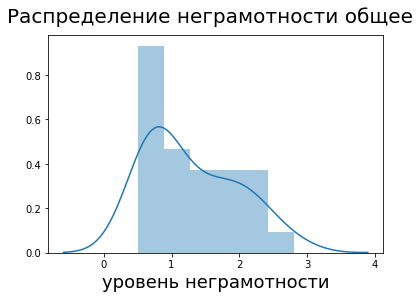

In [269]:
fig = plt.figure()
sns.distplot(df_common.Illiteracy, bins=6)
fig.suptitle('Распределение неграмотности общее', fontsize=20)
plt.xlabel('уровень неграмотности', fontsize=18)
plt.show();

<Figure size 432x288 with 0 Axes>

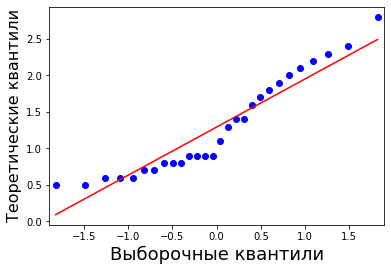

In [270]:
fig = plt.figure()
qqplot(df_common.Illiteracy, line='s')
plt.xlabel('Выборочные квантили', fontsize=18)
plt.ylabel('Теоретические квантили', fontsize=16)
plt.show();

Судя по графику, распределение не является нормальным - оно, очевидно, ассиметрично. Проверим нормальность по критерию Шапиро-Уилка, так как число наблюдений равно 50.

In [181]:
print(np.round(sps.shapiro(df_common.Illiteracy)[1], 4))

0.0146


Так как p-value  $<\alpha=0.05$ для распределения общего уровня неграмотности, то отвергаем нулевую гипотезу о нормальности распределения.

Распределение ненормально, выборок две, выборки независимые, поэтому воспользуемся критерием Манна-Уитни для проверки статистической незначимости различий средних уровней неграмотности на Севере и Юге.

In [187]:
np.round(mannwhitneyu(df_South.Illiteracy, df_North.Illiteracy)[1],4)

0.0

Так как p-value $<\alpha=0.05$, то отвергаем нулевую гипотезу о равенстве среднего уровня неграмотности на Севере и Юге $\Rightarrow$ уровень неграмотности зависит от региона сттраны.

Вывод: средний уровень неграмотности на Юге статистически отличается от среднего уровеня неграмотности на Севере, поэтому, говорим о том, что уровни неграмотности на Севере и Юге не равны.